<a href="https://colab.research.google.com/github/7seraph/cogs189project/blob/main/data_tuning_hyperparam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### BCI Competition 4 Dataset 2b

In [1]:
# Installing packages
%pip install numpy==1.26.4
%pip install matplotlib
%pip install scipy
%pip install pandas
%pip install scikit-learn
%pip install seaborn


# Loading packages
import numpy as np
import matplotlib.pyplot as plt
import scipy
import pandas as pd
import seaborn as sns
import sklearn

In [3]:
%pip install mne
import mne
mne.sys_info()

Platform             Linux-6.1.85+-x86_64-with-glibc2.35
Python               3.11.11 (main, Dec  4 2024, 08:55:07) [GCC 11.4.0]
Executable           /usr/bin/python3
CPU                  Intel(R) Xeon(R) CPU @ 2.20GHz (2 cores)
Memory               12.7 GiB

Core
├☑ mne               1.9.0 (latest release)
├☑ numpy             1.26.4 (OpenBLAS 0.3.23.dev with 2 threads)
├☑ scipy             1.14.1
└☑ matplotlib        3.10.0 (backend=module://matplotlib_inline.backend_inline)

Numerical (optional)
├☑ sklearn           1.6.1
├☑ numba             0.60.0
├☑ nibabel           5.3.2
├☑ cupy              13.3.0
├☑ pandas            2.2.2
├☑ h5py              3.12.1
└☐ unavailable       nilearn, dipy, openmeeg, h5io

Visualization (optional)
├☑ ipywidgets        7.7.1
└☐ unavailable       pyvista, pyvistaqt, vtk, qtpy, ipympl, pyqtgraph, mne-qt-browser, trame_client, trame_server, trame_vtk, trame_vuetify

Ecosystem (optional)
└☐ unavailable       mne-bids, mne-nirs, mne-features, mne-connec

In [21]:
'''NOTE: If you get an error when running this cell, it's because there is
a bug with mne and numpy. mne does not like the new version of numpy.
It should run on the first try, but if you try to load and run it the
second time, it won't work. You can run this notebook in a different
environment (colab/vscode/conda).
'''

# You may have to upload data/ folder first before running this cell!

# read all gdf files in folder
import os
import mne
file_path = 'data/'

for file in os.listdir(file_path):
    if file.endswith('.gdf'):
        #print(file)
        raw = mne.io.read_raw_gdf(file_path + file, preload=True)
        #print(raw.info)
        #print(raw.get_data().shape)

#

Extracting EDF parameters from /content/data/B0501T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG:C3, EEG:Cz, EEG:C4, EOG:ch01, EOG:ch02, EOG:ch03
Creating raw.info structure...
Reading 0 ... 604802  =      0.000 ...  2419.208 secs...


<ipython-input-21-a525876de62b>:18: RuntimeWarning: Highpass cutoff frequency 100.0 is greater than lowpass cutoff frequency 0.5, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_gdf(file_path + file, preload=True)


Extracting EDF parameters from /content/data/B0103T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG:C3, EEG:Cz, EEG:C4, EOG:ch01, EOG:ch02, EOG:ch03
Creating raw.info structure...
Reading 0 ... 469010  =      0.000 ...  1876.040 secs...


<ipython-input-21-a525876de62b>:18: RuntimeWarning: Highpass cutoff frequency 100.0 is greater than lowpass cutoff frequency 0.5, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_gdf(file_path + file, preload=True)


Extracting EDF parameters from /content/data/B0903T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG:C3, EEG:Cz, EEG:C4, EOG:ch01, EOG:ch02, EOG:ch03
Creating raw.info structure...
Reading 0 ... 460730  =      0.000 ...  1842.920 secs...


<ipython-input-21-a525876de62b>:18: RuntimeWarning: Highpass cutoff frequency 100.0 is greater than lowpass cutoff frequency 0.5, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_gdf(file_path + file, preload=True)


Extracting EDF parameters from /content/data/B0905E.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG:C3, EEG:Cz, EEG:C4, EOG:ch01, EOG:ch02, EOG:ch03
Creating raw.info structure...
Reading 0 ... 458570  =      0.000 ...  1834.280 secs...


<ipython-input-21-a525876de62b>:18: RuntimeWarning: Highpass cutoff frequency 100.0 is greater than lowpass cutoff frequency 0.5, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_gdf(file_path + file, preload=True)


Extracting EDF parameters from /content/data/B0701T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG:C3, EEG:Cz, EEG:C4, EOG:ch01, EOG:ch02, EOG:ch03
Creating raw.info structure...
Reading 0 ... 604802  =      0.000 ...  2419.208 secs...


<ipython-input-21-a525876de62b>:18: RuntimeWarning: Highpass cutoff frequency 100.0 is greater than lowpass cutoff frequency 0.5, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_gdf(file_path + file, preload=True)


Extracting EDF parameters from /content/data/B0803T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG:C3, EEG:Cz, EEG:C4, EOG:ch01, EOG:ch02, EOG:ch03
Creating raw.info structure...
Reading 0 ... 474834  =      0.000 ...  1899.336 secs...


<ipython-input-21-a525876de62b>:18: RuntimeWarning: Highpass cutoff frequency 100.0 is greater than lowpass cutoff frequency 0.5, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_gdf(file_path + file, preload=True)


Extracting EDF parameters from /content/data/B0602T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG:C3, EEG:Cz, EEG:C4, EOG:ch01, EOG:ch02, EOG:ch03
Creating raw.info structure...
Reading 0 ... 604802  =      0.000 ...  2419.208 secs...


<ipython-input-21-a525876de62b>:18: RuntimeWarning: Highpass cutoff frequency 100.0 is greater than lowpass cutoff frequency 0.5, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_gdf(file_path + file, preload=True)


Extracting EDF parameters from /content/data/B0102T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG:C3, EEG:Cz, EEG:C4, EOG:ch01, EOG:ch02, EOG:ch03
Creating raw.info structure...
Reading 0 ... 552451  =      0.000 ...  2209.804 secs...


<ipython-input-21-a525876de62b>:18: RuntimeWarning: Highpass cutoff frequency 100.0 is greater than lowpass cutoff frequency 0.5, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_gdf(file_path + file, preload=True)


Extracting EDF parameters from /content/data/B0203T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG:C3, EEG:Cz, EEG:C4, EOG:ch01, EOG:ch02, EOG:ch03
Creating raw.info structure...
Reading 0 ... 464154  =      0.000 ...  1856.616 secs...


<ipython-input-21-a525876de62b>:18: RuntimeWarning: Highpass cutoff frequency 100.0 is greater than lowpass cutoff frequency 0.5, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_gdf(file_path + file, preload=True)


Extracting EDF parameters from /content/data/B0302T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG:C3, EEG:Cz, EEG:C4, EOG:ch01, EOG:ch02, EOG:ch03
Creating raw.info structure...
Reading 0 ... 604802  =      0.000 ...  2419.208 secs...


<ipython-input-21-a525876de62b>:18: RuntimeWarning: Highpass cutoff frequency 100.0 is greater than lowpass cutoff frequency 0.5, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_gdf(file_path + file, preload=True)


Extracting EDF parameters from /content/data/B0604E.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG:C3, EEG:Cz, EEG:C4, EOG:ch01, EOG:ch02, EOG:ch03
Creating raw.info structure...
Reading 0 ... 469990  =      0.000 ...  1879.960 secs...


<ipython-input-21-a525876de62b>:18: RuntimeWarning: Highpass cutoff frequency 100.0 is greater than lowpass cutoff frequency 0.5, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_gdf(file_path + file, preload=True)


Extracting EDF parameters from /content/data/B0805E.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG:C3, EEG:Cz, EEG:C4, EOG:ch01, EOG:ch02, EOG:ch03
Creating raw.info structure...
Reading 0 ... 464306  =      0.000 ...  1857.224 secs...


<ipython-input-21-a525876de62b>:18: RuntimeWarning: Highpass cutoff frequency 100.0 is greater than lowpass cutoff frequency 0.5, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_gdf(file_path + file, preload=True)


Extracting EDF parameters from /content/data/B0801T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG:C3, EEG:Cz, EEG:C4, EOG:ch01, EOG:ch02, EOG:ch03
Creating raw.info structure...
Reading 0 ... 787728  =      0.000 ...  3150.912 secs...


<ipython-input-21-a525876de62b>:18: RuntimeWarning: Highpass cutoff frequency 100.0 is greater than lowpass cutoff frequency 0.5, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_gdf(file_path + file, preload=True)


Extracting EDF parameters from /content/data/B0101T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG:C3, EEG:Cz, EEG:C4, EOG:ch01, EOG:ch02, EOG:ch03
Creating raw.info structure...
Reading 0 ... 604802  =      0.000 ...  2419.208 secs...


<ipython-input-21-a525876de62b>:18: RuntimeWarning: Highpass cutoff frequency 100.0 is greater than lowpass cutoff frequency 0.5, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_gdf(file_path + file, preload=True)


Extracting EDF parameters from /content/data/B0804E.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG:C3, EEG:Cz, EEG:C4, EOG:ch01, EOG:ch02, EOG:ch03
Creating raw.info structure...
Reading 0 ... 474834  =      0.000 ...  1899.336 secs...


<ipython-input-21-a525876de62b>:18: RuntimeWarning: Highpass cutoff frequency 100.0 is greater than lowpass cutoff frequency 0.5, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_gdf(file_path + file, preload=True)


Extracting EDF parameters from /content/data/B0104E.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG:C3, EEG:Cz, EEG:C4, EOG:ch01, EOG:ch02, EOG:ch03
Creating raw.info structure...
Reading 0 ... 466313  =      0.000 ...  1865.252 secs...


<ipython-input-21-a525876de62b>:18: RuntimeWarning: Highpass cutoff frequency 100.0 is greater than lowpass cutoff frequency 0.5, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_gdf(file_path + file, preload=True)


Extracting EDF parameters from /content/data/B0802T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG:C3, EEG:Cz, EEG:C4, EOG:ch01, EOG:ch02, EOG:ch03
Creating raw.info structure...
Reading 0 ... 604802  =      0.000 ...  2419.208 secs...


<ipython-input-21-a525876de62b>:18: RuntimeWarning: Highpass cutoff frequency 100.0 is greater than lowpass cutoff frequency 0.5, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_gdf(file_path + file, preload=True)


Extracting EDF parameters from /content/data/B0304E.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG:C3, EEG:Cz, EEG:C4, EOG:ch01, EOG:ch02, EOG:ch03
Creating raw.info structure...
Reading 0 ... 464674  =      0.000 ...  1858.696 secs...


<ipython-input-21-a525876de62b>:18: RuntimeWarning: Highpass cutoff frequency 100.0 is greater than lowpass cutoff frequency 0.5, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_gdf(file_path + file, preload=True)


Extracting EDF parameters from /content/data/B0902T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG:C3, EEG:Cz, EEG:C4, EOG:ch01, EOG:ch02, EOG:ch03
Creating raw.info structure...
Reading 0 ... 604802  =      0.000 ...  2419.208 secs...


<ipython-input-21-a525876de62b>:18: RuntimeWarning: Highpass cutoff frequency 100.0 is greater than lowpass cutoff frequency 0.5, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_gdf(file_path + file, preload=True)


Extracting EDF parameters from /content/data/B0603T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG:C3, EEG:Cz, EEG:C4, EOG:ch01, EOG:ch02, EOG:ch03
Creating raw.info structure...
Reading 0 ... 470390  =      0.000 ...  1881.560 secs...


<ipython-input-21-a525876de62b>:18: RuntimeWarning: Highpass cutoff frequency 100.0 is greater than lowpass cutoff frequency 0.5, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_gdf(file_path + file, preload=True)


Extracting EDF parameters from /content/data/B0502T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG:C3, EEG:Cz, EEG:C4, EOG:ch01, EOG:ch02, EOG:ch03
Creating raw.info structure...
Reading 0 ... 696265  =      0.000 ...  2785.060 secs...


<ipython-input-21-a525876de62b>:18: RuntimeWarning: Highpass cutoff frequency 100.0 is greater than lowpass cutoff frequency 0.5, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_gdf(file_path + file, preload=True)


Extracting EDF parameters from /content/data/B0204E.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG:C3, EEG:Cz, EEG:C4, EOG:ch01, EOG:ch02, EOG:ch03
Creating raw.info structure...
Reading 0 ... 361829  =      0.000 ...  1447.316 secs...


<ipython-input-21-a525876de62b>:18: RuntimeWarning: Highpass cutoff frequency 100.0 is greater than lowpass cutoff frequency 0.5, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_gdf(file_path + file, preload=True)


Extracting EDF parameters from /content/data/B0703T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG:C3, EEG:Cz, EEG:C4, EOG:ch01, EOG:ch02, EOG:ch03
Creating raw.info structure...
Reading 0 ... 466726  =      0.000 ...  1866.904 secs...


<ipython-input-21-a525876de62b>:18: RuntimeWarning: Highpass cutoff frequency 100.0 is greater than lowpass cutoff frequency 0.5, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_gdf(file_path + file, preload=True)


Extracting EDF parameters from /content/data/B0205E.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG:C3, EEG:Cz, EEG:C4, EOG:ch01, EOG:ch02, EOG:ch03
Creating raw.info structure...
Reading 0 ... 473686  =      0.000 ...  1894.744 secs...


<ipython-input-21-a525876de62b>:18: RuntimeWarning: Highpass cutoff frequency 100.0 is greater than lowpass cutoff frequency 0.5, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_gdf(file_path + file, preload=True)


Extracting EDF parameters from /content/data/B0301T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG:C3, EEG:Cz, EEG:C4, EOG:ch01, EOG:ch02, EOG:ch03
Creating raw.info structure...
Reading 0 ... 604802  =      0.000 ...  2419.208 secs...


<ipython-input-21-a525876de62b>:18: RuntimeWarning: Highpass cutoff frequency 100.0 is greater than lowpass cutoff frequency 0.5, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_gdf(file_path + file, preload=True)


Extracting EDF parameters from /content/data/B0705E.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG:C3, EEG:Cz, EEG:C4, EOG:ch01, EOG:ch02, EOG:ch03
Creating raw.info structure...
Reading 0 ... 460894  =      0.000 ...  1843.576 secs...


<ipython-input-21-a525876de62b>:18: RuntimeWarning: Highpass cutoff frequency 100.0 is greater than lowpass cutoff frequency 0.5, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_gdf(file_path + file, preload=True)


Extracting EDF parameters from /content/data/B0601T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG:C3, EEG:Cz, EEG:C4, EOG:ch01, EOG:ch02, EOG:ch03
Creating raw.info structure...
Reading 0 ... 604802  =      0.000 ...  2419.208 secs...


<ipython-input-21-a525876de62b>:18: RuntimeWarning: Highpass cutoff frequency 100.0 is greater than lowpass cutoff frequency 0.5, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_gdf(file_path + file, preload=True)


Extracting EDF parameters from /content/data/B0605E.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG:C3, EEG:Cz, EEG:C4, EOG:ch01, EOG:ch02, EOG:ch03
Creating raw.info structure...
Reading 0 ... 460902  =      0.000 ...  1843.608 secs...


<ipython-input-21-a525876de62b>:18: RuntimeWarning: Highpass cutoff frequency 100.0 is greater than lowpass cutoff frequency 0.5, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_gdf(file_path + file, preload=True)


Extracting EDF parameters from /content/data/B0904E.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG:C3, EEG:Cz, EEG:C4, EOG:ch01, EOG:ch02, EOG:ch03
Creating raw.info structure...
Reading 0 ... 466802  =      0.000 ...  1867.208 secs...


<ipython-input-21-a525876de62b>:18: RuntimeWarning: Highpass cutoff frequency 100.0 is greater than lowpass cutoff frequency 0.5, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_gdf(file_path + file, preload=True)


Extracting EDF parameters from /content/data/B0403T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG:C3, EEG:Cz, EEG:C4, EOG:ch01, EOG:ch02, EOG:ch03
Creating raw.info structure...
Reading 0 ... 468558  =      0.000 ...  1874.232 secs...


<ipython-input-21-a525876de62b>:18: RuntimeWarning: Highpass cutoff frequency 100.0 is greater than lowpass cutoff frequency 0.5, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_gdf(file_path + file, preload=True)


Extracting EDF parameters from /content/data/B0503T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG:C3, EEG:Cz, EEG:C4, EOG:ch01, EOG:ch02, EOG:ch03
Creating raw.info structure...
Reading 0 ... 461874  =      0.000 ...  1847.496 secs...


<ipython-input-21-a525876de62b>:18: RuntimeWarning: Highpass cutoff frequency 100.0 is greater than lowpass cutoff frequency 0.5, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_gdf(file_path + file, preload=True)


Extracting EDF parameters from /content/data/B0702T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG:C3, EEG:Cz, EEG:C4, EOG:ch01, EOG:ch02, EOG:ch03
Creating raw.info structure...
Reading 0 ... 604802  =      0.000 ...  2419.208 secs...


<ipython-input-21-a525876de62b>:18: RuntimeWarning: Highpass cutoff frequency 100.0 is greater than lowpass cutoff frequency 0.5, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_gdf(file_path + file, preload=True)


Extracting EDF parameters from /content/data/B0303T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG:C3, EEG:Cz, EEG:C4, EOG:ch01, EOG:ch02, EOG:ch03
Creating raw.info structure...
Reading 0 ... 464674  =      0.000 ...  1858.696 secs...


<ipython-input-21-a525876de62b>:18: RuntimeWarning: Highpass cutoff frequency 100.0 is greater than lowpass cutoff frequency 0.5, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_gdf(file_path + file, preload=True)


Extracting EDF parameters from /content/data/B0201T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG:C3, EEG:Cz, EEG:C4, EOG:ch01, EOG:ch02, EOG:ch03
Creating raw.info structure...
Reading 0 ... 604802  =      0.000 ...  2419.208 secs...


<ipython-input-21-a525876de62b>:18: RuntimeWarning: Highpass cutoff frequency 100.0 is greater than lowpass cutoff frequency 0.5, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_gdf(file_path + file, preload=True)


Extracting EDF parameters from /content/data/B0402T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG:C3, EEG:Cz, EEG:C4, EOG:ch01, EOG:ch02, EOG:ch03
Creating raw.info structure...
Reading 0 ... 696265  =      0.000 ...  2785.060 secs...


<ipython-input-21-a525876de62b>:18: RuntimeWarning: Highpass cutoff frequency 100.0 is greater than lowpass cutoff frequency 0.5, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_gdf(file_path + file, preload=True)


Extracting EDF parameters from /content/data/B0504E.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG:C3, EEG:Cz, EEG:C4, EOG:ch01, EOG:ch02, EOG:ch03
Creating raw.info structure...
Reading 0 ... 417019  =      0.000 ...  1668.076 secs...


<ipython-input-21-a525876de62b>:18: RuntimeWarning: Highpass cutoff frequency 100.0 is greater than lowpass cutoff frequency 0.5, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_gdf(file_path + file, preload=True)


Extracting EDF parameters from /content/data/B0105E.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG:C3, EEG:Cz, EEG:C4, EOG:ch01, EOG:ch02, EOG:ch03
Creating raw.info structure...
Reading 0 ... 474362  =      0.000 ...  1897.448 secs...


<ipython-input-21-a525876de62b>:18: RuntimeWarning: Highpass cutoff frequency 100.0 is greater than lowpass cutoff frequency 0.5, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_gdf(file_path + file, preload=True)


Extracting EDF parameters from /content/data/B0505E.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG:C3, EEG:Cz, EEG:C4, EOG:ch01, EOG:ch02, EOG:ch03
Creating raw.info structure...
Reading 0 ... 464958  =      0.000 ...  1859.832 secs...


<ipython-input-21-a525876de62b>:18: RuntimeWarning: Highpass cutoff frequency 100.0 is greater than lowpass cutoff frequency 0.5, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_gdf(file_path + file, preload=True)


Extracting EDF parameters from /content/data/B0305E.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG:C3, EEG:Cz, EEG:C4, EOG:ch01, EOG:ch02, EOG:ch03
Creating raw.info structure...
Reading 0 ... 463618  =      0.000 ...  1854.472 secs...


<ipython-input-21-a525876de62b>:18: RuntimeWarning: Highpass cutoff frequency 100.0 is greater than lowpass cutoff frequency 0.5, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_gdf(file_path + file, preload=True)


Extracting EDF parameters from /content/data/B0401T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG:C3, EEG:Cz, EEG:C4, EOG:ch01, EOG:ch02, EOG:ch03
Creating raw.info structure...
Reading 0 ... 604802  =      0.000 ...  2419.208 secs...


<ipython-input-21-a525876de62b>:18: RuntimeWarning: Highpass cutoff frequency 100.0 is greater than lowpass cutoff frequency 0.5, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_gdf(file_path + file, preload=True)


Extracting EDF parameters from /content/data/B0202T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG:C3, EEG:Cz, EEG:C4, EOG:ch01, EOG:ch02, EOG:ch03
Creating raw.info structure...
Reading 0 ... 604802  =      0.000 ...  2419.208 secs...


<ipython-input-21-a525876de62b>:18: RuntimeWarning: Highpass cutoff frequency 100.0 is greater than lowpass cutoff frequency 0.5, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_gdf(file_path + file, preload=True)


Extracting EDF parameters from /content/data/B0704E.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG:C3, EEG:Cz, EEG:C4, EOG:ch01, EOG:ch02, EOG:ch03
Creating raw.info structure...
Reading 0 ... 470343  =      0.000 ...  1881.372 secs...


<ipython-input-21-a525876de62b>:18: RuntimeWarning: Highpass cutoff frequency 100.0 is greater than lowpass cutoff frequency 0.5, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_gdf(file_path + file, preload=True)


Extracting EDF parameters from /content/data/B0404E.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG:C3, EEG:Cz, EEG:C4, EOG:ch01, EOG:ch02, EOG:ch03
Creating raw.info structure...
Reading 0 ... 467478  =      0.000 ...  1869.912 secs...


<ipython-input-21-a525876de62b>:18: RuntimeWarning: Highpass cutoff frequency 100.0 is greater than lowpass cutoff frequency 0.5, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_gdf(file_path + file, preload=True)


Extracting EDF parameters from /content/data/B0405E.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG:C3, EEG:Cz, EEG:C4, EOG:ch01, EOG:ch02, EOG:ch03
Creating raw.info structure...
Reading 0 ... 466050  =      0.000 ...  1864.200 secs...


<ipython-input-21-a525876de62b>:18: RuntimeWarning: Highpass cutoff frequency 100.0 is greater than lowpass cutoff frequency 0.5, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_gdf(file_path + file, preload=True)


Extracting EDF parameters from /content/data/B0901T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG:C3, EEG:Cz, EEG:C4, EOG:ch01, EOG:ch02, EOG:ch03
Creating raw.info structure...
Reading 0 ... 604802  =      0.000 ...  2419.208 secs...


<ipython-input-21-a525876de62b>:18: RuntimeWarning: Highpass cutoff frequency 100.0 is greater than lowpass cutoff frequency 0.5, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_gdf(file_path + file, preload=True)


Effective window size : 8.192 (s)
Plotting power spectral density (dB=True).


<ipython-input-5-d15577b10a45>:2: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.compute_psd().plot()


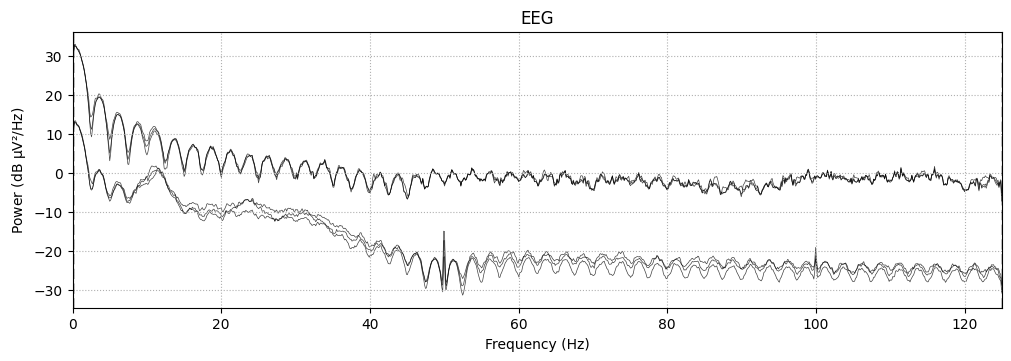

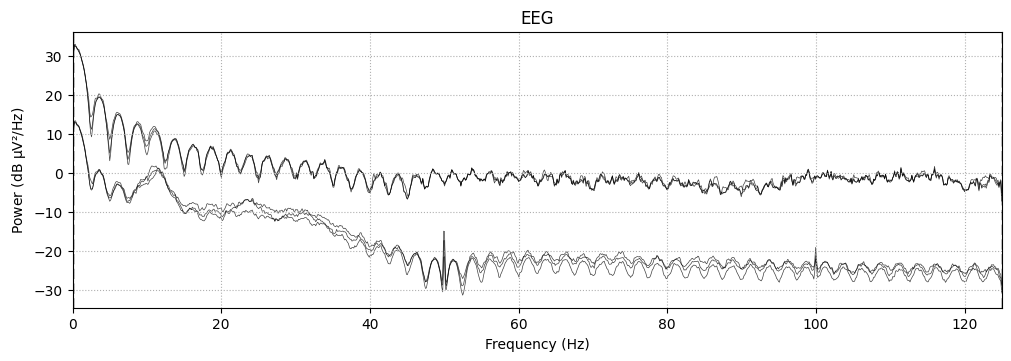

In [5]:
# plot eeg visualization (raw, unfiltered)
raw.compute_psd().plot()


In [22]:
# list out all channels
print(raw.ch_names)

# remove EOG channels
raw.drop_channels(['EOG:ch01', 'EOG:ch02', 'EOG:ch03'])

# have a copy before filter for exploration
base_raw = raw.copy()
print(raw.ch_names)

['EEG:C3', 'EEG:Cz', 'EEG:C4', 'EOG:ch01', 'EOG:ch02', 'EOG:ch03']
['EEG:C3', 'EEG:Cz', 'EEG:C4']


In [7]:
# bandpass filter of 8-30 Hz
raw.filter(8, 30)

# plot eeg visualization
raw.compute_psd().plot

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 413 samples (1.652 s)

Effective window size : 8.192 (s)


<bound method BaseSpectrum.plot of <Power Spectrum (from Raw, welch method) | 3 channels × 1025 freqs, 0.0-125.0 Hz>>

In [8]:
# Check all variables in dataset
print(raw.info)
#print(raw.ch_names)

<Info | 8 non-empty values
 bads: []
 ch_names: EEG:C3, EEG:Cz, EEG:C4
 chs: 3 EEG
 custom_ref_applied: False
 highpass: 8.0 Hz
 lowpass: 30.0 Hz
 meas_date: 2005-11-29 14:19:32 UTC
 nchan: 3
 projs: []
 sfreq: 250.0 Hz
 subject_info: <subject_info | his_id: B09, sex: 0, last_name: X, birthday: 1979-06-01>
>


Used Annotations descriptions: ['1023', '1077', '1078', '1079', '1081', '276', '277', '32766', '768', '769', '770']
['EEG:C3', 'EEG:Cz', 'EEG:C4']
Multiple event values for single event times found. Creating new event value to reflect simultaneous events.
Not setting metadata
253 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 253 events and 176 original time points ...
1 bad epochs dropped
Computing rank from data with rank=None
    Using tolerance 6.4e-07 (2.2e-16 eps * 3 dim * 9.6e+08  max singular value)
    Estimated rank (data): 3
    data: rank 3 computed from 3 data channels with 0 projectors
Reducing data rank from 3 -> 3
Estimating class=2 covariance using EMPIRICAL
Done.
Estimating class=3 covariance using EMPIRICAL
Done.
Estimating class=4 covariance using EMPIRICAL
Done.
Estimating class=5 covariance using EMPIRICAL
Done.
Estimating class=6 covariance using EMPIRICAL
Done.
Estimating class=7 covariance usi

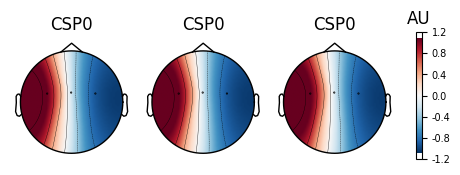

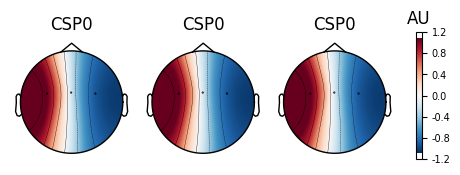

In [9]:
# csp
from mne.decoding import CSP
from mne import Epochs, pick_types, events_from_annotations
from mne.channels import make_standard_montage

# get events
events, _ = events_from_annotations(raw)

# check available channel names
print(raw.ch_names)

# rename channels to match the montage nomenclature if they exist
channel_mapping = {ch: ch.split(':')[-1] for ch in raw.ch_names if ch.startswith('EEG:')}
raw.rename_channels(channel_mapping)

# add a standard montage
montage = make_standard_montage('standard_1020')
raw.set_montage(montage, match_case=False) # Set montage before creating epochs

# get epochs
epochs = Epochs(raw, events, tmin=-0.2, tmax=0.5, baseline=None, event_repeated='merge')

# get data
X = epochs.get_data()
y = epochs.events[:, -1]


# get csp
csp = CSP(n_components=4, reg=None, log=True, norm_trace=False)

# fit csp
csp.fit(X, y)

# plot csp
csp.plot_patterns(epochs.info, components=[0, 0.1, 0.2])

In [10]:
# prompt: after running a csp algorithm, perform a 80/20 train/test split

from sklearn.model_selection import train_test_split

# Assuming X and y are defined from the previous code (CSP output)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")

Training data shape: (201, 3, 176)
Testing data shape: (51, 3, 176)


Fitting ICA to data using 3 channels (please be patient, this may take a while)
Using data from preloaded Raw for 252 events and 176 original time points ...
Selecting by number: 3 components
Using data from preloaded Raw for 252 events and 176 original time points ...
Fitting ICA took 0.5s.


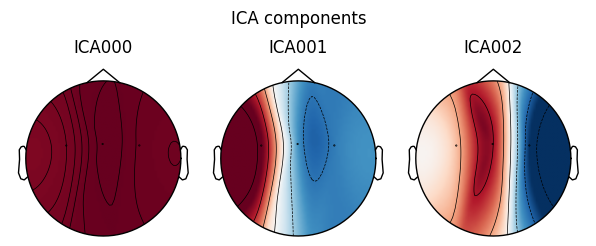

Fitting ICA to data using 3 channels (please be patient, this may take a while)
Selecting by number: 3 components
Fitting ICA took 2.8s.
    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
1209 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
1209 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
1209 matching events found
No baseline correction applied
0 projection items activated


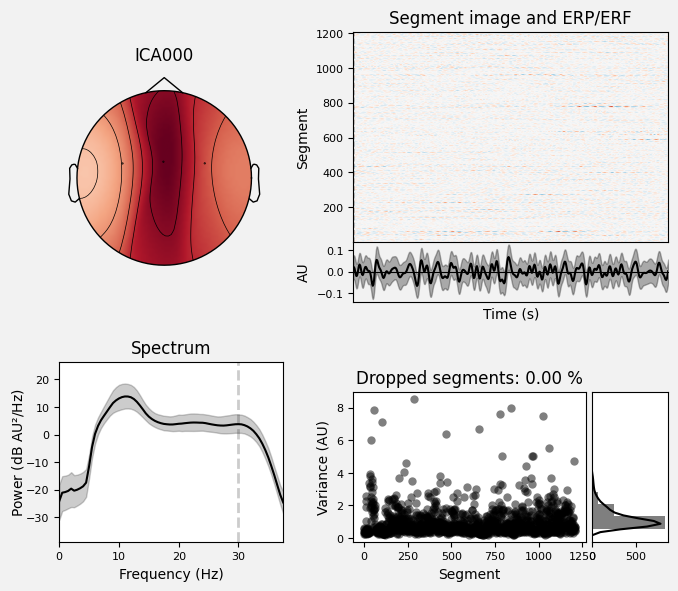

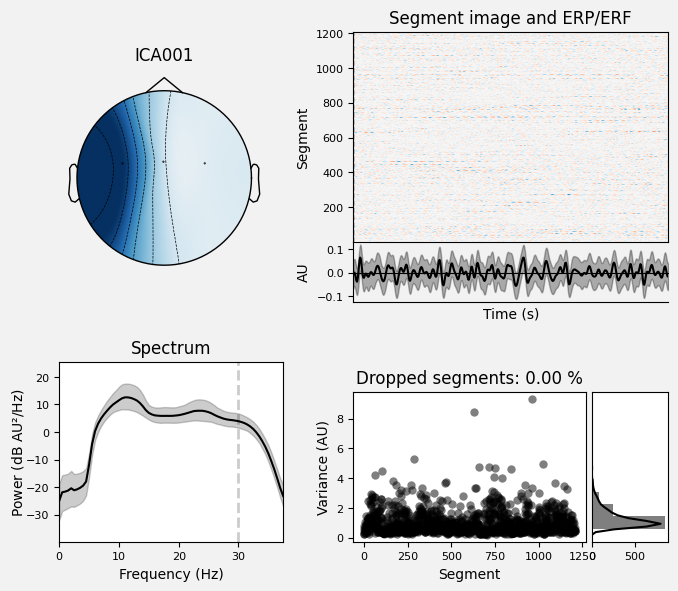

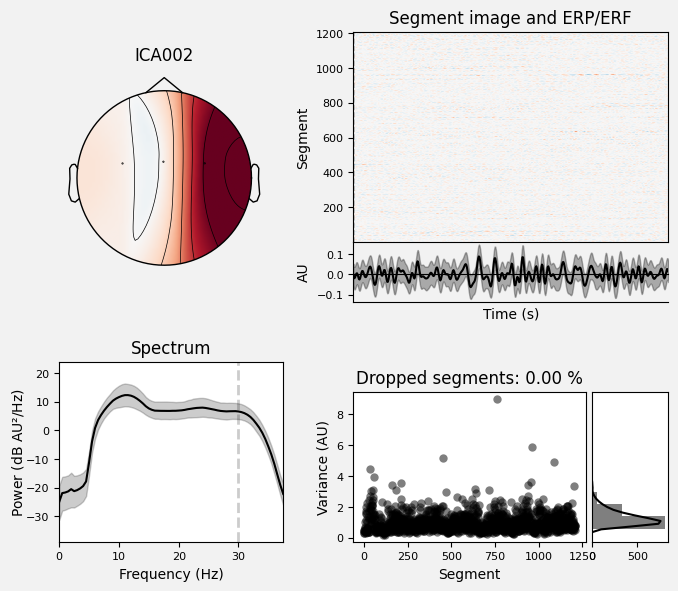

[<Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>]

In [11]:
ica = mne.preprocessing.ICA(n_components=3, random_state=97, max_iter=800)
ica.fit(epochs)
ica.plot_components()

ica.fit(raw)
ica.plot_properties(raw)

Applying ICA to Raw instance
    Transforming to ICA space (3 components)
    Zeroing out 0 ICA components
    Projecting back using 3 PCA components


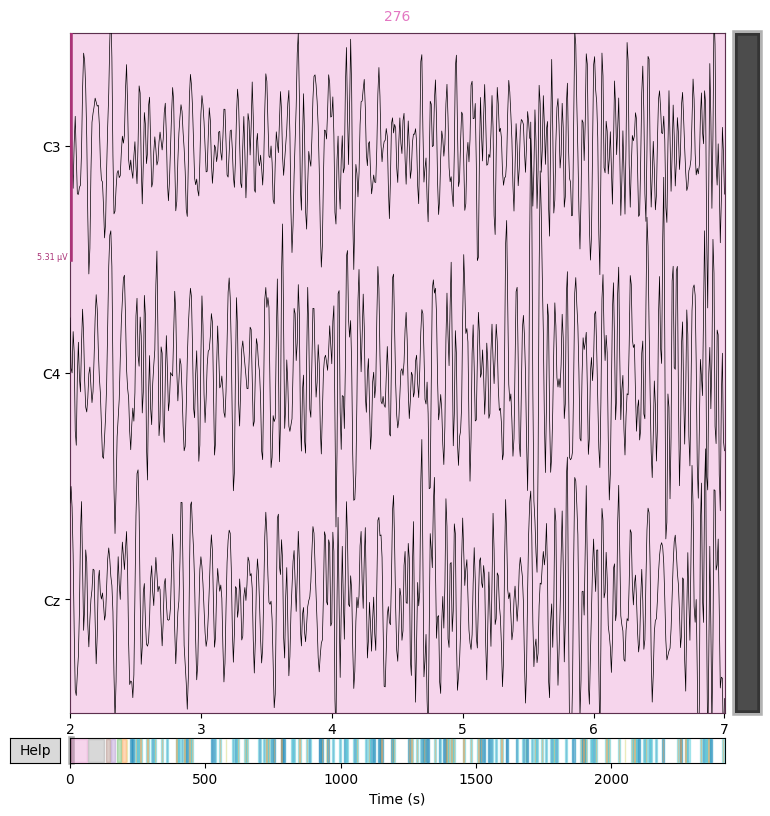

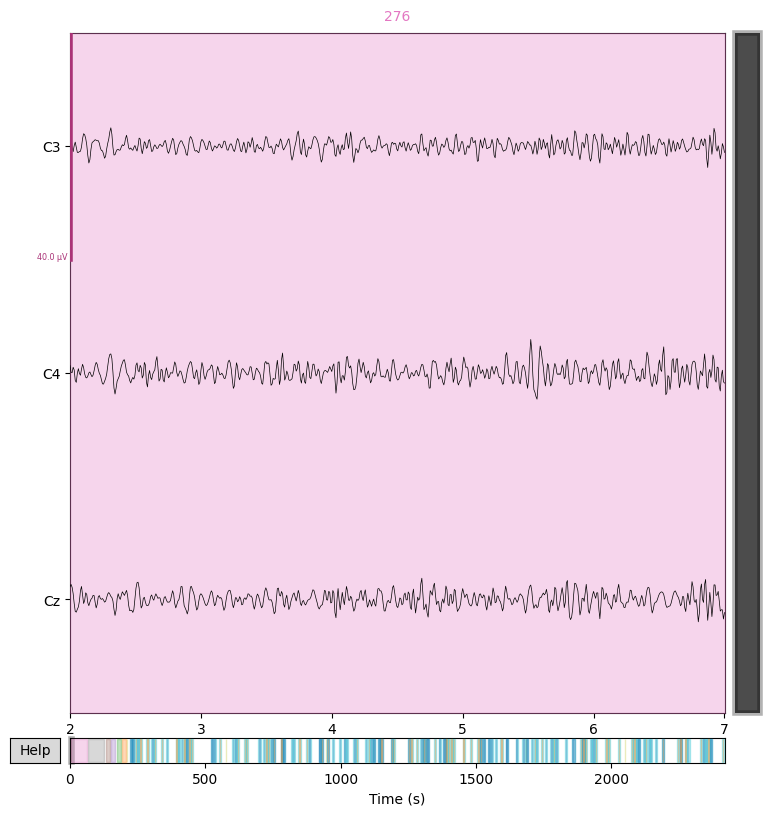

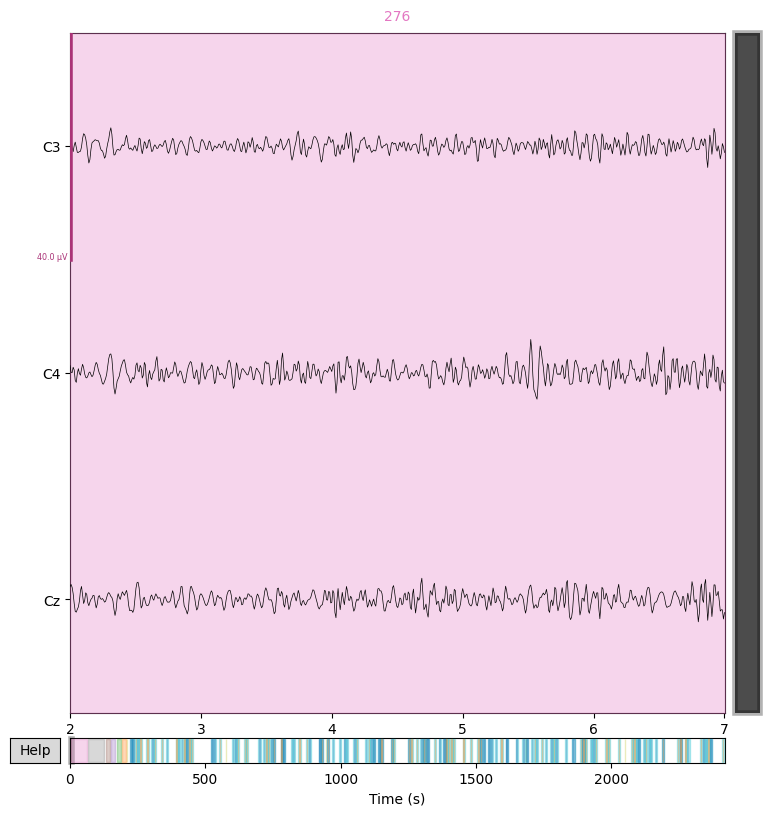

In [13]:
orig_raw = raw.copy()
raw.load_data()
ica.apply(raw)

chs = [
    "C3",
    "C4",
    "Cz",
]

chan_idxs = [raw.ch_names.index(ch) for ch in chs]
orig_raw.plot(order=chan_idxs, start=2, duration=5, scalings="auto")
raw.plot(order=chan_idxs, start=2, duration=5)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 40 - 60 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 40.00
- Lower transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 35.00 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 15.00 Hz (-6 dB cutoff frequency: 67.50 Hz)
- Filter length: 83 samples (0.332 s)

Effective window size : 8.192 (s)
Plotting power spectral density (dB=True).


<ipython-input-24-a4ecb514a243>:4: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  base_raw.compute_psd().plot()


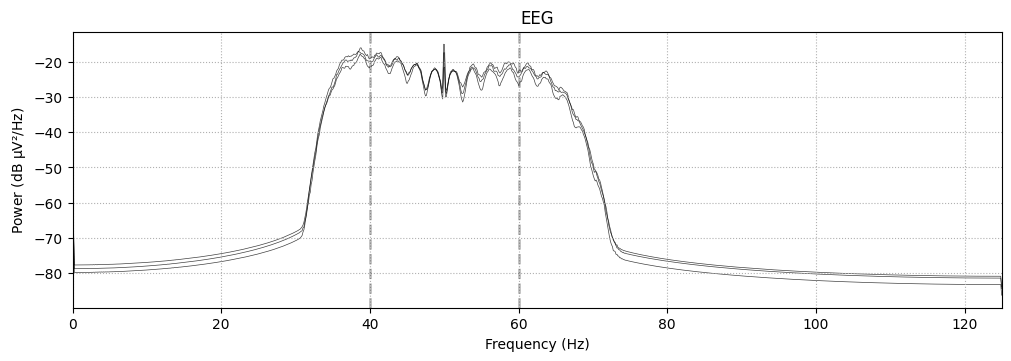

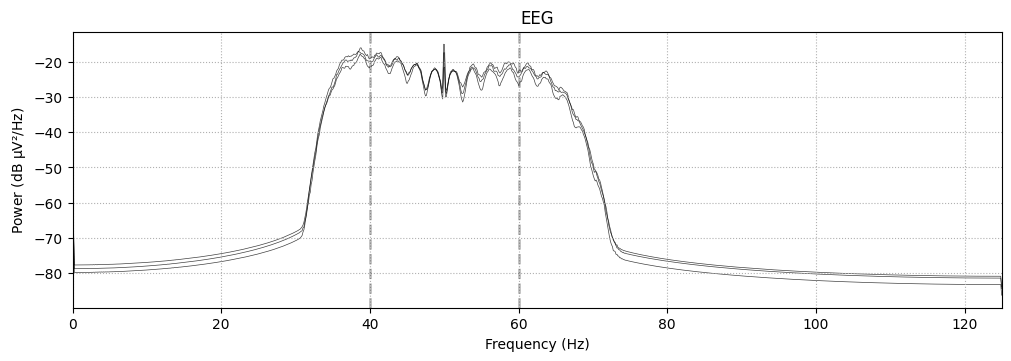

In [24]:
# Experiment with bandpass filters (40, 60)
base_raw.filter(40, 60)

base_raw.compute_psd().plot()


Used Annotations descriptions: ['1023', '1077', '1078', '1079', '1081', '276', '277', '32766', '768', '769', '770']
['EEG:C3', 'EEG:Cz', 'EEG:C4']
Multiple event values for single event times found. Creating new event value to reflect simultaneous events.
Not setting metadata
253 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 253 events and 176 original time points ...
1 bad epochs dropped
Computing rank from data with rank=None
    Using tolerance 2.9e-06 (2.2e-16 eps * 3 dim * 4.4e+09  max singular value)
    Estimated rank (data): 3
    data: rank 3 computed from 3 data channels with 0 projectors
Reducing data rank from 3 -> 3
Estimating class=2 covariance using EMPIRICAL
Done.
Estimating class=3 covariance using EMPIRICAL
Done.
Estimating class=4 covariance using EMPIRICAL
Done.
Estimating class=5 covariance using EMPIRICAL
Done.
Estimating class=6 covariance using EMPIRICAL
Done.
Estimating class=7 covariance usi

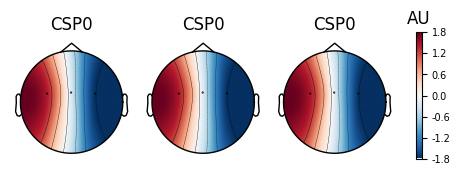

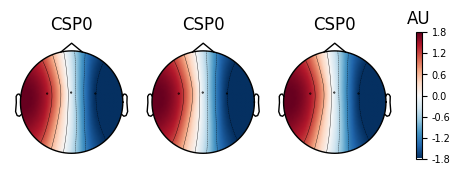

In [25]:
#perform csp
# csp
from mne.decoding import CSP
from mne import Epochs, pick_types, events_from_annotations
from mne.channels import make_standard_montage

# get events
events, _ = events_from_annotations(raw)

# check available channel names
print(raw.ch_names)

# rename channels to match the montage nomenclature if they exist
channel_mapping = {ch: ch.split(':')[-1] for ch in raw.ch_names if ch.startswith('EEG:')}
raw.rename_channels(channel_mapping)

# add a standard montage
montage = make_standard_montage('standard_1020')
raw.set_montage(montage, match_case=False) # Set montage before creating epochs

# get epochs
epochs = Epochs(raw, events, tmin=-0.2, tmax=0.5, baseline=None, event_repeated='merge')

# get data
X = epochs.get_data()
y = epochs.events[:, -1]


# get csp
csp = CSP(n_components=4, reg=None, log=True, norm_trace=False)

# fit csp
csp.fit(X, y)

# plot csp
csp.plot_patterns(epochs.info, components=[0, 0.1, 0.2])

In [29]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# get csp features
X_train_csp = csp.transform(X_train)

# get csp features
X_test_csp = csp.transform(X_test)

# get lda
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()

# fit lda
lda.fit(X_train_csp, y_train)

# get lda score
lda.score(X_test_csp, y_test)

# get lda prediction
lda.predict(X_test_csp)

# get lda prediction probabilities
#lda.predict_proba(X_test_csp)


array([10,  8,  9,  9, 11,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10,
        9, 10,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,
        9,  9, 10,  9,  9,  9,  9, 10, 10,  9,  9, 11,  9,  9,  9,  9,  9])

In [30]:
# get confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, lda.predict(X_test_csp))

# get classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, lda.predict(X_test_csp)))


              precision    recall  f1-score   support

           8       1.00      1.00      1.00         1
           9       0.48      0.91      0.62        22
          10       0.17      0.10      0.12        10
          11       0.00      0.00      0.00        10
          12       0.00      0.00      0.00         8

    accuracy                           0.43        51
   macro avg       0.33      0.40      0.35        51
weighted avg       0.26      0.43      0.31        51



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [31]:
# cross validation
from sklearn.model_selection import cross_val_score
cross_val_score(lda, X_train_csp, y_train, cv=5)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


array([0.26829268, 0.325     , 0.325     , 0.325     , 0.35      ])